In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
df = pd.read_csv('bom.movie_gross.csv')
df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
# Preview the dataset
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


4 columns and 3387 rows present

In [ ]:
# Lets get the columns
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
# Lets describe our data
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# Data cleaning

In [ ]:
# We will change the columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
# We shall check the number of unique values in each column
df.nunique()

,0
title,3386
studio,257
domestic_gross,1797
foreign_gross,1204
year,9


In [ ]:
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [ ]:
# Check for the missing values in each column
df.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [ ]:
# We can check for the proportion of missing values
df.isna().mean()

,0
title,0.000000
studio,0.001476
domestic_gross,0.008267
foreign_gross,0.398583
year,0.000000


In [ ]:
# Lets get the rows which have missing data
df[df.isnull().any(axis=1)]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
222,Flipped,WB,1800000.0,NaN,2010
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
# Replacing the missing value with zero

df['foreign_gross'] = df['foreign_gross'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Data visualization

<Axes: xlabel='year'>

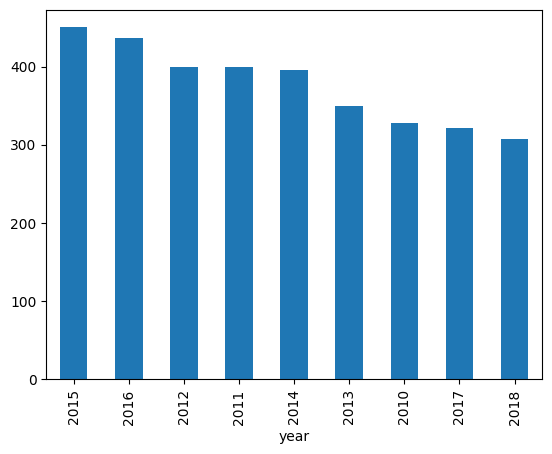

In [ ]:
#Plotting a bar graph
df['year'].value_counts().plot(kind='bar')

<Axes: >

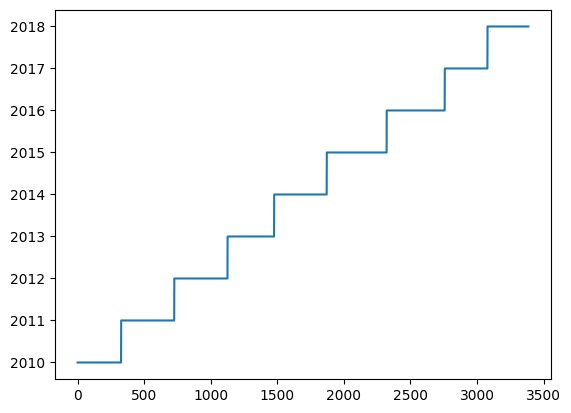

In [ ]:
#plotting a step plot
df['year'].plot(kind='line')

<Axes: ylabel='Frequency'>

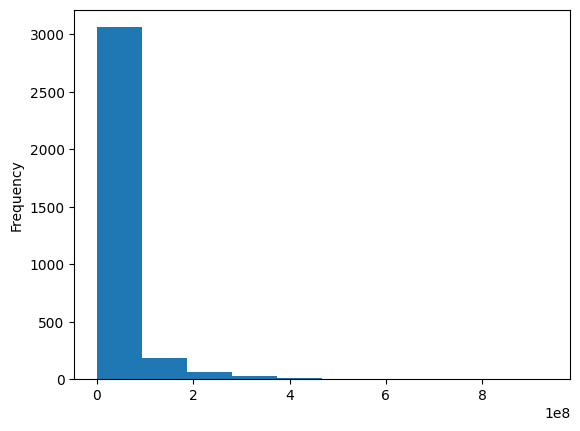

In [ ]:
#plotting a histogram
df['domestic_gross'].plot(kind='hist')

<Axes: >

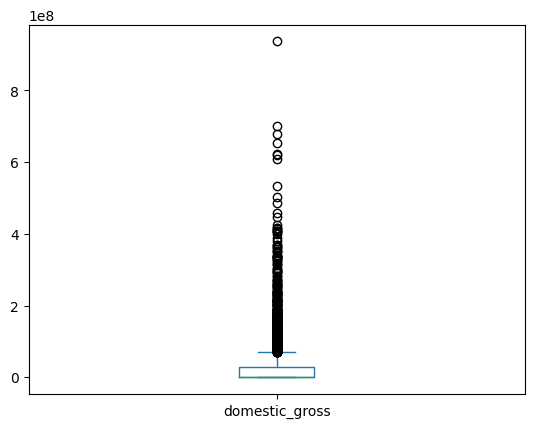

In [ ]:
# Plotting a boxplot
df['domestic_gross'].plot(kind='box')

<Axes: xlabel='year', ylabel='domestic_gross'>

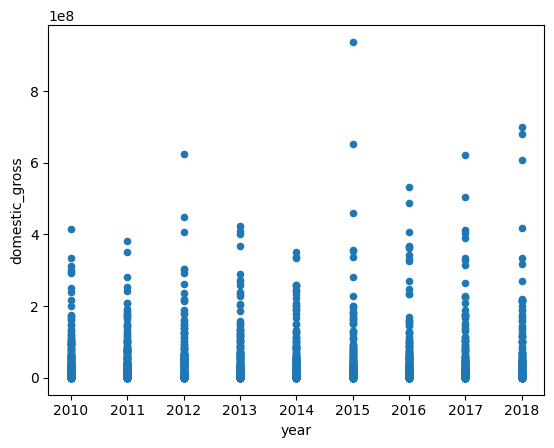

In [ ]:
#plotting a scatter plot
df.plot(kind='scatter', x='year', y='domestic_gross')

<Axes: >

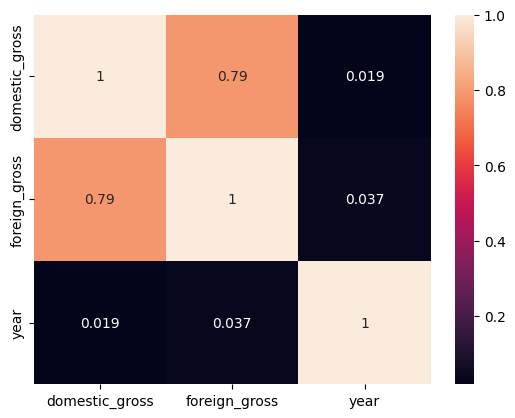

In [ ]:
#plotting a heat map
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df['foreign_gross'] = df['foreign_gross'].fillna(0)
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Conclusion**




* *Support Low-Performing Studios with Targeted Marketing*
Use trends from top earners to guide promotion strategies for studios with lower revenues.

* *Adjust Budgets Based on Revenue Patterns*
Align film budgets and release timing with periods of higher box office performance.

